In [13]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## Load the dataset
 
file_path = "wine.csv"

wine = pd.read_csv(file_path)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Data Exploration

In [18]:
#check null values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [22]:
# Check for categorical columns
for col in wine.columns:
    if wine[col].nunique() < 15:
        print(col)

quality


In [28]:
mapping = {"good":1, "bad":0}

wine["quality"] = wine.quality.map(mapping)

In [35]:
wine_data_encoded = pd.get_dummies(wine, columns=["quality"])
wine_data_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_0,quality_1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


In [36]:
target = "quality"

X = wine_data_encoded
y = wine[target].values

In [37]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_0,quality_1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


In [38]:
y[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:",(X_train.shape, y_train.shape))
print("Val set:", (X_val.shape, y_val.shape))
print("test set:",(X_test.shape, y_test.shape))

Training set: ((1119, 13), (1119,))
Val set: ((240, 13), (240,))
test set: ((240, 13), (240,))


In [44]:
# Scaling the features 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [48]:
num_features = X_train_scaled.shape[1]
print(num_features)

13


In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(num_features,)), # hiddenlayer1
    tf.keras.layers.Dense(32, activation="relu", input_shape=(64,32)), # hiddenlayer2
    tf.keras.layers.Dense(1, activation="sigmoid") # OUTPUT_LAYER
])

In [54]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
OPTIMIZER = "SGD"
LOSS = "binary_crossentropy"
metrics = ["accuracy"]

model.compile(
    optimizer= OPTIMIZER,
    loss= LOSS,
    metrics= metrics
)

In [56]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val_scaled, y_val))

Epoch 1/10
35/35 [==============================] - 1s 9ms/step - loss: 0.6914 - accuracy: 0.5344 - val_loss: 0.6336 - val_accuracy: 0.7292
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.8811 - val_loss: 0.5323 - val_accuracy: 0.9292
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.9750 - val_loss: 0.4388 - val_accuracy: 0.9833
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.9893 - val_loss: 0.3529 - val_accuracy: 0.9875
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.9929 - val_loss: 0.2791 - val_accuracy: 0.9917
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9955 - val_loss: 0.2193 - val_accuracy: 0.9917
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9955 - val_loss: 0.1731 - val_accuracy: 0.9917
Epoch 8/10
35/35 [==

In [57]:
model_params = model.get_weights()
print("Model parameters (weights and biases):", model_params)

Model parameters (weights and biases): [array([[-7.35993683e-02,  2.01450199e-01,  2.02163290e-02,
        -1.23905838e-01, -6.88626766e-02,  9.29051787e-02,
         1.11828789e-01,  1.85299784e-01, -2.35905256e-02,
         1.09657332e-01,  2.21099690e-01,  3.52207758e-02,
        -1.41280010e-01, -8.88625905e-02,  2.46313184e-01,
         1.24632597e-01, -1.43866852e-01,  3.68133225e-02,
        -1.60360560e-01, -8.30993280e-02, -2.52853933e-04,
         1.73746228e-01, -6.05206229e-02,  2.04639241e-01,
        -1.74401864e-01,  6.95830435e-02, -2.02979264e-03,
        -1.98145792e-01, -2.25347400e-01, -3.06850728e-02,
        -9.62004066e-02, -3.66522633e-02,  2.66228821e-02,
        -1.92789331e-01, -8.85868892e-02, -2.41790324e-01,
        -1.03672892e-01, -1.79841056e-01, -9.30926278e-02,
        -5.40596060e-02, -1.06506227e-02,  1.94894746e-01,
        -1.06220923e-01,  4.94756624e-02,  1.15185082e-01,
         2.64623970e-01, -1.31463319e-01,  1.72516510e-01,
         1.83128

In [58]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.691389,0.534406,0.633554,0.729167
1,0.579514,0.881144,0.532311,0.929167
2,0.479956,0.974978,0.438782,0.983333
3,0.388126,0.989276,0.352923,0.987500
4,0.306748,0.992851,0.279082,0.991667
5,0.239991,0.995532,0.219335,0.991667
6,0.187886,0.995532,0.173117,0.991667
7,0.148233,0.996425,0.137864,0.995833
8,0.118493,0.996425,0.111188,1.000000
9,0.096058,0.998213,0.090990,1.000000


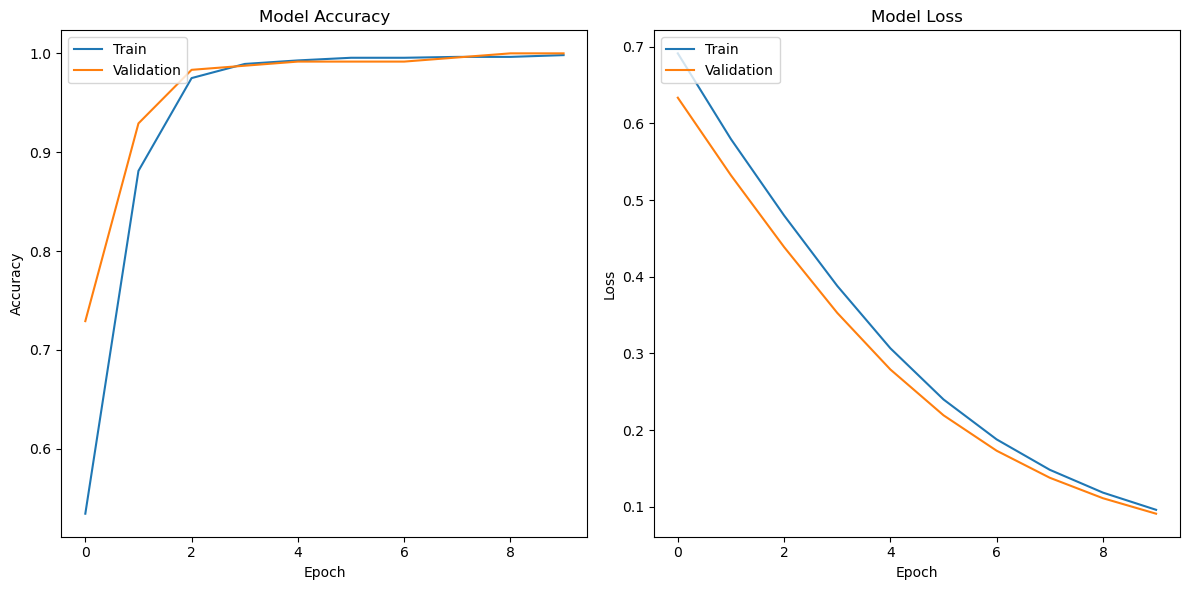

In [60]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

8/8 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 1.0000
Test Loss: 0.08493522554636002, Test Accuracy: 1.0
